<a href="https://colab.research.google.com/github/03sans/Titanic_Survival_Prediction/blob/main/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
#mounting drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [292]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [293]:
#loading csv files
titanic_train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
titanic_test = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

In [294]:
#viewing the train data for EDA to understand structure and quality of data
titanic_train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [295]:
#quick statistical summary of the numerical columns in the train set
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [296]:
#datatypes of each column
titanic_train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [297]:
#shows the shape to be (891, 12) and shows plenty of NaN values in various columns
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [298]:
#categorical value --> 0 not survived and 1 survived
titanic_train['Survived'].value_counts()

,count
Survived,
0,549
1,342


/tmp/ipython-input-299-13252369.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_train, palette='Set1')


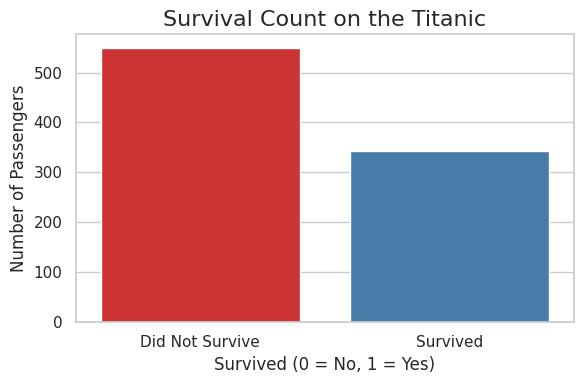

In [299]:
#visualizing this data in a bar plot using matplotlib and seaborn
import seaborn as sns

sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_train, palette='Set1')

# Customize the plot
plt.title('Survival Count on the Titanic', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.tight_layout()
plt.show()

In [300]:
titanic_train['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


/tmp/ipython-input-301-2465451414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=titanic_train, palette='Set2')


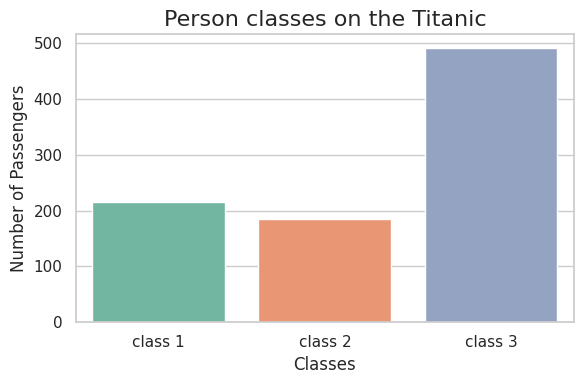

In [301]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=titanic_train, palette='Set2')

# Customize the plot
plt.title('Person classes on the Titanic', fontsize=16)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks( [0, 1, 2],['class 1', 'class 2', 'class 3'])
plt.tight_layout()
plt.show()

In [302]:
titanic_train['Sex'].value_counts()

,count
Sex,
male,577
female,314


/tmp/ipython-input-303-2234753816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic_train, palette='Set3')


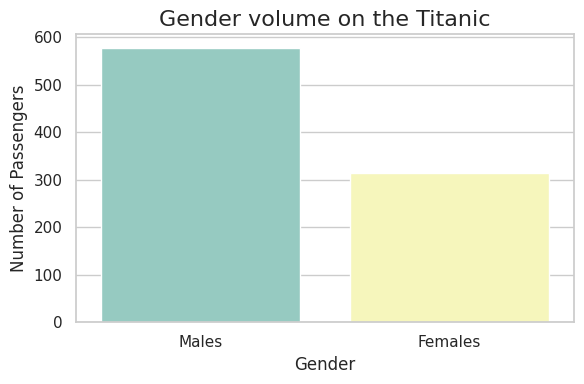

In [303]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=titanic_train, palette='Set3')

# Customize the plot
plt.title('Gender volume on the Titanic', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks( [0, 1],['Males', 'Females'])
plt.tight_layout()
plt.show()

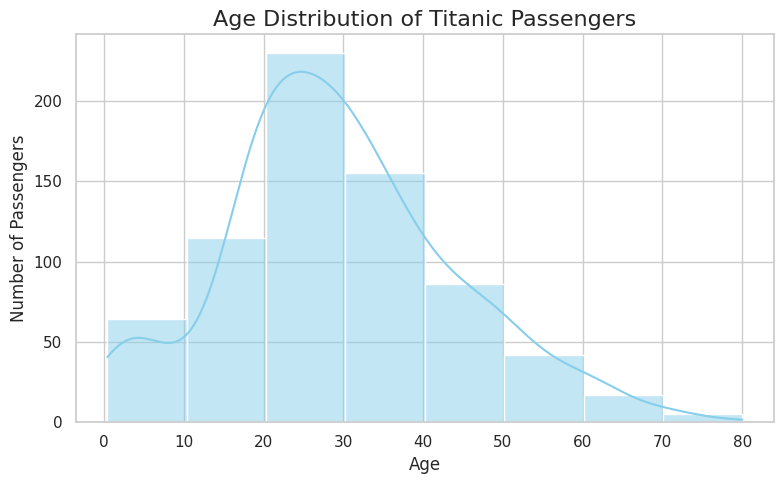

In [304]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(data=titanic_train, x='Age', bins=8, kde=True, color='skyblue')

plt.title('Age Distribution of Titanic Passengers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.tight_layout()
plt.show()

In [305]:
# Select only numeric columns
numeric_cols = titanic_train.select_dtypes(include='number')
numeric_cols.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [306]:
#encoding 'Sex' column for correlation and further model training
titanic_train['Sex_encoded'] = titanic_train['Sex'].map({'male': 0, 'female': 1})

In [307]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [308]:
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)
embarked_dummies = pd.get_dummies(titanic_train['Embarked'], prefix='Embarked', drop_first=True)
embarked_dummies = embarked_dummies.astype(int)
titanic_train = pd.concat([titanic_train, embarked_dummies], axis=1)
titanic_train.head()

/tmp/ipython-input-308-52704496.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [309]:
# Select only numeric columns
numeric_cols = titanic_train.select_dtypes(include='number')
numeric_cols.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1


In [310]:
titanic_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], inplace=True)

In [311]:
titanic_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [312]:
titanic_train.isnull().sum()

,0
Survived,0
Pclass,0
Age,177
SibSp,0
Parch,0
Fare,0
Sex_encoded,0
Embarked_Q,0
Embarked_S,0


In [313]:
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)

/tmp/ipython-input-313-2119010136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)


In [314]:
titanic_train.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_encoded,0
Embarked_Q,0
Embarked_S,0


In [315]:
corr_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_Q', 'Embarked_S']
corr_matrix = titanic_train[corr_cols].corr()

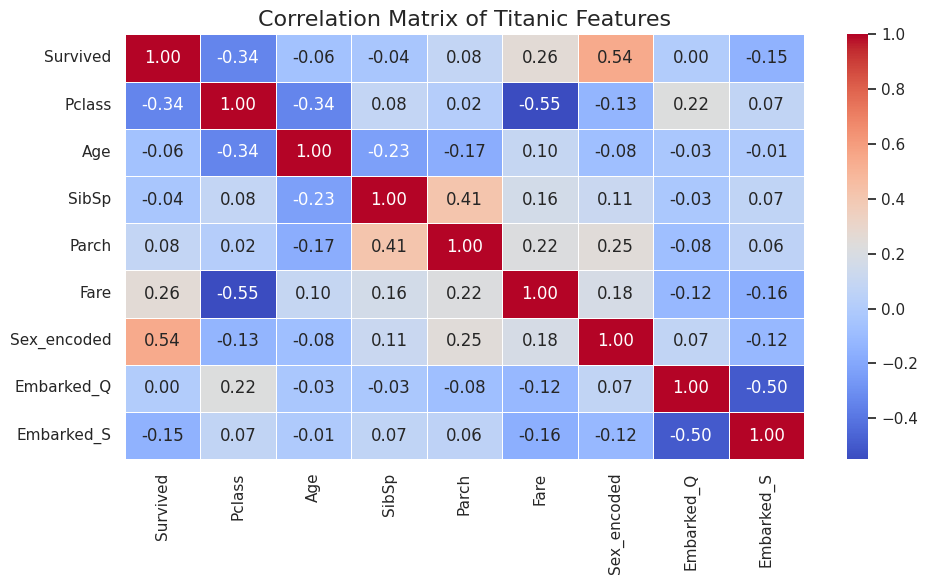

In [316]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Titanic Features', fontsize=16)
plt.tight_layout()
plt.show()

In [317]:
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

In [318]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [319]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [320]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [321]:
titanic_test.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [322]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [323]:
titanic_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [324]:
embarked_dummies = pd.get_dummies(titanic_test['Embarked'], prefix='Embarked', drop_first=True)
embarked_dummies = embarked_dummies.astype(int)
titanic_test = pd.concat([titanic_test, embarked_dummies], axis=1)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1


In [325]:
titanic_test['Sex_encoded'] = titanic_test['Sex'].map({'male': 0, 'female': 1})

In [326]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S,Sex_encoded
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1,1


In [327]:
titanic_test.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

In [328]:
titanic_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_encoded
0,892,3,34.5,0,0,7.8292,1,0,0
1,893,3,47.0,1,0,7.0000,0,1,1
2,894,2,62.0,0,0,9.6875,1,0,0
3,895,3,27.0,0,0,8.6625,0,1,0
4,896,3,22.0,1,1,12.2875,0,1,1


In [329]:
titanic_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked_Q,0
Embarked_S,0
Sex_encoded,0


In [330]:
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)

/tmp/ipython-input-330-1343340809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)


In [331]:
titanic_test['Fare'].fillna(titanic_test['Fare'].mode()[0], inplace=True)

/tmp/ipython-input-331-3021074222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_test['Fare'].fillna(titanic_test['Fare'].mode()[0], inplace=True)


In [332]:
titanic_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0
Sex_encoded,0


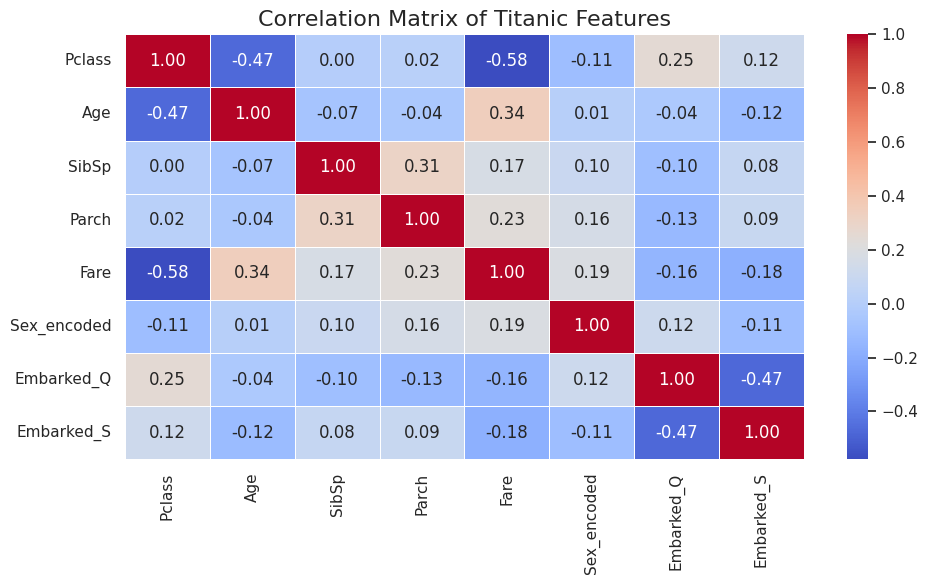

In [333]:
corr_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_Q', 'Embarked_S']
corr_matrix = titanic_test[corr_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Titanic Features', fontsize=16)
plt.tight_layout()
plt.show()

In [334]:
X_test = titanic_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_Q', 'Embarked_S']]
y_pred = model.predict(X_test)

In [335]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [337]:
submission = pd.DataFrame({
    'PassengerId': titanic_test['PassengerId'],
    'Survived': y_pred
})

submission.to_csv('titanic_submission.csv', index=False)

In [338]:
from google.colab import files
files.download('titanic_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>